# DataImportFilter

In [1]:
using DataFramesMeta, CSV, Kroki
dir = pwd() * "/";

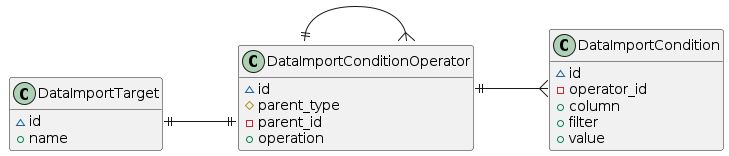

In [2]:
plantuml"""
class DataImportTarget {
    ~ id
    + name
}
class DataImportConditionOperator {
    ~ id
    # parent_type
    - parent_id
    + operation
}
class DataImportCondition {
    ~ id
    - operator_id
    + column
    + filter
    + value
}
hide methods
left to right direction

DataImportTarget::id ||--|| DataImportConditionOperator::parent_id
DataImportConditionOperator ||--{ DataImportConditionOperator
DataImportConditionOperator::id ||--{ DataImportCondition::operator_id
"""

## Example

In [3]:
# data_import_targets
data_import_targets = CSV.read(dir * "data_import_targets.csv", DataFrame)

Row,id,name
,Int64,String7
1,1,Items


In [4]:
# data_import_condition_operators
data_import_condition_operators = CSV.read(dir * "data_import_condition_operators.csv", DataFrame)

Row,id,parent_type,parent_id,operation,name
,Int64,String31,Int64,String3,String31
1,1,DataImportTarget,1,AND,Base condition
2,2,DataImportConditionOperator,1,AND,Common condition
3,3,DataImportConditionOperator,1,OR,Any condition
4,4,DataImportConditionOperator,3,AND,Type A
5,5,DataImportConditionOperator,3,AND,Type B
6,6,DataImportConditionOperator,3,OR,Type C
7,7,DataImportConditionOperator,6,AND,Type C-1
8,8,DataImportConditionOperator,6,AND,Type C-2


In [5]:
# data_import_conditions
data_import_conditions = CSV.read(dir * "data_import_conditions.csv", DataFrame)

Row,id,operator_id,column,filter,value
,Int64,Int64,String15,String7,String31
1,1,2,name,matches,^[^\\*]
2,2,2,created_at,lteq,2020-01-01 00:00:00
3,3,4,category,eq,Type A
4,4,5,category,eq,Type B
5,5,7,category,eq,Type C
6,6,8,name,matches,\\sType C\\s


In [6]:
# combined
@chain data_import_condition_operators begin
    leftjoin(select(data_import_conditions, Not(:id)), on= :id => :operator_id)
    sort(:id)
end

Row,id,parent_type,parent_id,operation,name,column,filter,value
,Int64,String31,Int64,String3,String31,String15?,String7?,String31?
1,1,DataImportTarget,1,AND,Base condition,missing,missing,missing
2,2,DataImportConditionOperator,1,AND,Common condition,name,matches,^[^\\*]
3,2,DataImportConditionOperator,1,AND,Common condition,created_at,lteq,2020-01-01 00:00:00
4,3,DataImportConditionOperator,1,OR,Any condition,missing,missing,missing
5,4,DataImportConditionOperator,3,AND,Type A,category,eq,Type A
6,5,DataImportConditionOperator,3,AND,Type B,category,eq,Type B
7,6,DataImportConditionOperator,3,OR,Type C,missing,missing,missing
8,7,DataImportConditionOperator,6,AND,Type C-1,category,eq,Type C
9,8,DataImportConditionOperator,6,AND,Type C-2,name,matches,\\sType C\\s
